# SMS spam detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("SpamCollectionSMS",sep='\t',names=['label','message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})

In [9]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

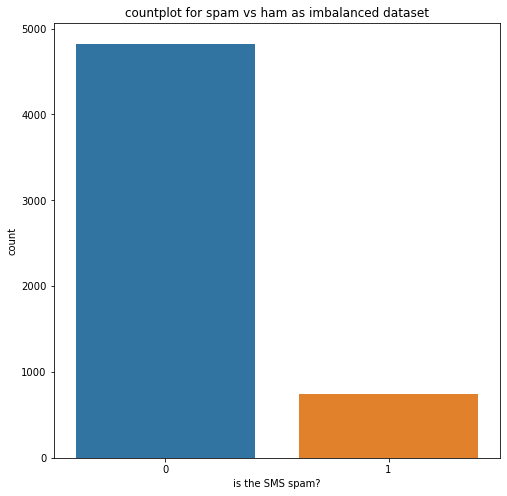

In [12]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('countplot for spam vs ham as imbalanced dataset')
p=plt.xlabel('is the SMS spam?')
p=plt.ylabel('count')

In [14]:
only_spam=dataset[dataset['label']==1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [15]:
dataset.shape

(5572, 2)

In [17]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [18]:
count

6

In [19]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])

In [20]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [21]:
dataset.reset_index()

,index,label,message
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [23]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


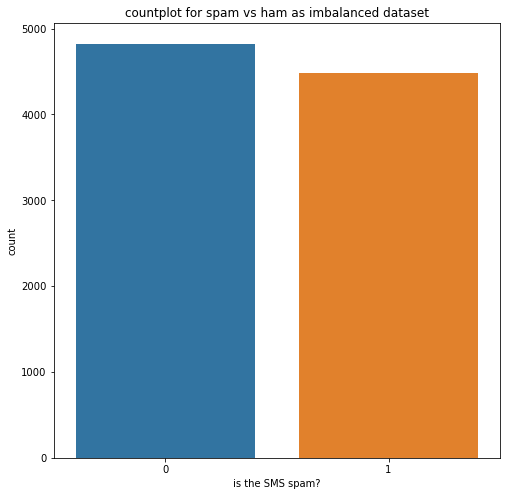

In [24]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('countplot for spam vs ham as imbalanced dataset')
p=plt.xlabel('is the SMS spam?')
p=plt.ylabel('count')

In [29]:
dataset['word_count']=dataset['message'].apply(lambda x: len(x.split()))

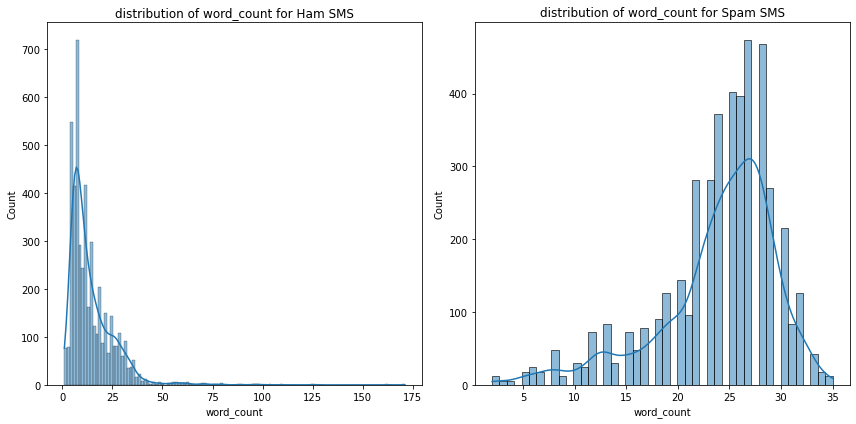

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count,kde=True)
p=plt.title('distribution of word_count for Ham SMS')

plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count,kde=True)
p=plt.title('distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [32]:
def currency(data):
    currency_symbols=['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0
    

In [33]:
dataset['contains_currency_symbols']=dataset['message'].apply(currency)

In [34]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


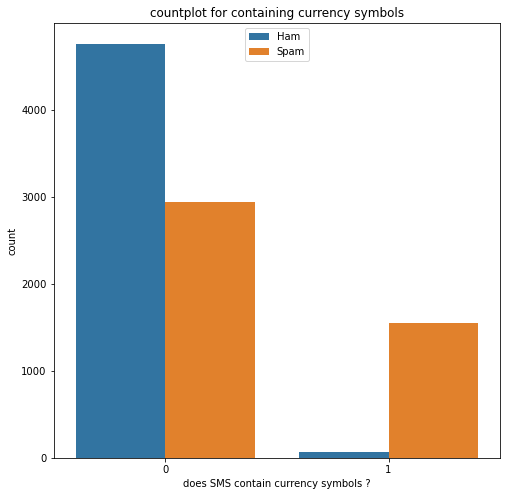

In [36]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='contains_currency_symbols',data=dataset,hue='label')

p=plt.title('countplot for containing currency symbols')
p=plt.xlabel('does SMS contain currency symbols ?')
p=plt.ylabel('count')
p=plt.legend(labels=['Ham','Spam'],loc=9)

In [40]:
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [41]:
dataset['contains_num']=dataset['message'].apply(number)

In [42]:
dataset

,label,message,word_count,contains_currency_symbols,contains_num
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


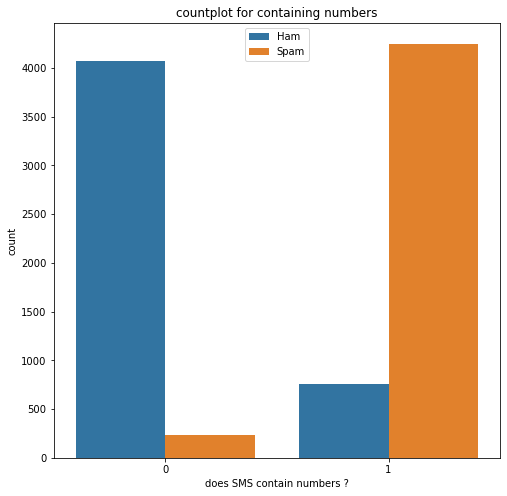

In [44]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='contains_num',data=dataset,hue='label')

p=plt.title('countplot for containing numbers')
p=plt.xlabel('does SMS contain numbers ?')
p=plt.ylabel('count')
p=plt.legend(labels=['Ham','Spam'],loc=9)

In [47]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thota\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thota\AppData\Roaming\nltk_data...


In [60]:
corpus=[]
wnl=WordNetLemmatizer()

for sns in list(dataset.message):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sns)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=''.join(lemm_words)
    
    corpus.append(message)

In [57]:
corpus

['ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationalrate',
 'ndtimetriedcontactuupoundprizeclaimeasycallpperminutebtnationa

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

In [62]:
x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [63]:
x

,accordinglyrepeattextwordokmobilephonesend,accountcreditedfreetextmessageactivatetxtwordcreditcwwwbiz,accountxxxxxxxxxshowunredeemedpointclaimcallidentifiercodexxxxxexpires,adultcontentvideoshortly,askedmobilechatlinesinclufreeminindiacustservssedyeslergotmegabilldontgivshitbailiffduedaywant,auctionroundhighestbidnextmaximumbidbidsendbidegbidgoodluck,awardedsipixdigitalcameracalllandlinedeliverywithindaycboxbpyrwarrantyppmpp,believetrueincredibletxtsreplyglearntrulyamazingthingblowmindfwdptxt,bloombergmessagecenterwaitapplyfuturehttpcareerbloombergcom,boredhousewifechatndatebtnationalratepminlandline,...,winneruspeciallyselectedreceivecashholidayflightincspeakliveoperatorclaim,winneruspeciallyselectedreceiveholidayflightincspeakliveoperatorclaimpmin,winnervaluednetworkcustomerhvaeselectedreceiverewardcollectcallvalidhouraclpm,winnervaluednetworkcustomerselectedreceiveaprizerewardclaimcallclaimcodeklvalidhour,winnewestharrypotterorderphoenixbookreplyharryanswerquestionchancefirstamongreader,winwinnermrfoleyipodexcitingprizesoonkeepeyeurmobilevisitwwwwincouk,winyearsupplycdstoreurchoiceworthenterweeklydrawtxtmusictcwwwldewcomsubwinppmx,xmasrewardwaitingcomputerrandomlypickedloyalmobilecustomerreceiverewardcall,xxxmobilemovieclubusecreditclickwaplinknexttxtmessageclickhttpwapxxxmobilemovieclubcomnqjkgighjjgcbl,yesplacetownmeetexcitingadultsingleuktxtchatpmsg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [65]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_train

,accordinglyrepeattextwordokmobilephonesend,accountcreditedfreetextmessageactivatetxtwordcreditcwwwbiz,accountxxxxxxxxxshowunredeemedpointclaimcallidentifiercodexxxxxexpires,adultcontentvideoshortly,askedmobilechatlinesinclufreeminindiacustservssedyeslergotmegabilldontgivshitbailiffduedaywant,auctionroundhighestbidnextmaximumbidbidsendbidegbidgoodluck,awardedsipixdigitalcameracalllandlinedeliverywithindaycboxbpyrwarrantyppmpp,believetrueincredibletxtsreplyglearntrulyamazingthingblowmindfwdptxt,bloombergmessagecenterwaitapplyfuturehttpcareerbloombergcom,boredhousewifechatndatebtnationalratepminlandline,...,winneruspeciallyselectedreceivecashholidayflightincspeakliveoperatorclaim,winneruspeciallyselectedreceiveholidayflightincspeakliveoperatorclaimpmin,winnervaluednetworkcustomerhvaeselectedreceiverewardcollectcallvalidhouraclpm,winnervaluednetworkcustomerselectedreceiveaprizerewardclaimcallclaimcodeklvalidhour,winnewestharrypotterorderphoenixbookreplyharryanswerquestionchancefirstamongreader,winwinnermrfoleyipodexcitingprizesoonkeepeyeurmobilevisitwwwwincouk,winyearsupplycdstoreurchoiceworthenterweeklydrawtxtmusictcwwwldewcomsubwinppmx,xmasrewardwaitingcomputerrandomlypickedloyalmobilecustomerreceiverewardcall,xxxmobilemovieclubusecreditclickwaplinknexttxtmessageclickhttpwapxxxmobilemovieclubcomnqjkgighjjgcbl,yesplacetownmeetexcitingadultsingleuktxtchatpmsg
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#navie bayes model
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.569
0.007


In [69]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

In [70]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       965
           1       1.00      0.37      0.54       897

    accuracy                           0.70      1862
   macro avg       0.82      0.69      0.66      1862
weighted avg       0.81      0.70      0.66      1862



In [72]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[965,   0],
       [564, 333]], dtype=int64)

In [73]:
plt.figure(fogsize=(8,8))
axis_labels=['ham','spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5})
p=plt.title('confusion matrix of MNB model')
p=plt.xlabel('actual values')
p=plt.ylabel('predicted values')


TypeError: __init__() got an unexpected keyword argument 'fogsize'

In [74]:
from  sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))


0.942
0.006


In [75]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)

In [76]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       965
           1       1.00      0.88      0.93       897

    accuracy                           0.94      1862
   macro avg       0.95      0.94      0.94      1862
weighted avg       0.95      0.94      0.94      1862



In [77]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[965,   0],
       [111, 786]], dtype=int64)

In [83]:
def predict_spam(sms):
    message= re.sub(pattern="[a-zA-Z]", repl='',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=''.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)